
# Cortical folding scales universally with surface area and thickness, not number of neurons, Science 349 (6243), 74-77

Here we perform the same analysis but using a dataset obtained via MRI of Healthy Humans. 

For a self-avoiding crumpled surface, one expects a relation between the mean thickness $T$, total ($A_t$) and exposed area ($A_e$)

$$ T^{1/2} A_t = k A_{e}^{\beta}$$

with $\beta_{\text{teo}} = 5/4$. Finding that the cortex follows this relation with the index $\alpha$ very close to the value expected for about $\sim 50$ different mammals from different clades:

1. Imposes physical restrictions on a possible real cortex.

2. Suggests that the cortex is an elastic self-avoiding crumpled surface in thermodynamical equilibrium. The white matter has to produce work while expanding against the cerebrospinal fluid subjected to the restriction of not intersect itself.

3. Suggests that the cortex is a fractal object (power-law relation).

4. Implies that the usual morphological variables $\{T, A_t,A_e\}$ used to describe the cortex morphology are correlated.


In [8]:
# libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D  #For 3D plot

# 1. Human cortex

Using multiple site datasets is a little tricky! The different acquisition protocols leads to a relative mismatch on the measurements (type B errors). Here we provide a fully harmonized dataset in which the harmonized variables are indentified by the suffix **_new_** and with the addition **_withAge_ ** when the age dependence was preserved.

note: The harmonized variables are actually the log10() of the morphological variables

In [23]:
df_to_analyze = pd.read_excel("All_datasets.xlsx")
# withAge == no deaging
# Power-law relation
df_to_analyze["y"] = np.log10(np.sqrt(df_to_analyze["AvgThickness"])*df_to_analyze["TotalArea_corrected"])
df_to_analyze["x"] = np.log10(df_to_analyze["ExposedArea_corrected"])
df_to_analyze["ynew_withAge"] = 0.5*df_to_analyze["AvgThicknessnew_withAge"] + df_to_analyze["TotalArea_correctednew_withAge"]
df_to_analyze["xnew_withAge"] = df_to_analyze["ExposedArea_correctednew_withAge"]

# Novel morphological variables
norm1 = np.sqrt( ( (1/4)**2 + 1 + (1.25)**2) )
norm2 = np.sqrt( 6 )
norm3 = np.sqrt( (9/2)**2 + (3/2)**2 + (3/4)**2)

df_to_analyze["K"] = (0.5*df_to_analyze["AvgThicknessnew"] + df_to_analyze["TotalArea_correctednew"] - 1.25*df_to_analyze["ExposedArea_correctednew"])/norm1
df_to_analyze["I"] = (2*df_to_analyze["AvgThicknessnew"] + df_to_analyze["TotalArea_correctednew"] + df_to_analyze["ExposedArea_correctednew"])/norm2
df_to_analyze["S"] = (-9*df_to_analyze["AvgThicknessnew"]/2 + 3*df_to_analyze["TotalArea_correctednew"]/2 + 3*df_to_analyze["ExposedArea_correctednew"]/4)/norm3

df_to_analyze["K_withAge"] = (0.5*df_to_analyze["AvgThicknessnew_withAge"] + df_to_analyze["TotalArea_correctednew_withAge"] - 1.25*df_to_analyze["ExposedArea_correctednew_withAge"])/norm1
df_to_analyze["I_withAge"] = (2*df_to_analyze["AvgThicknessnew_withAge"] + df_to_analyze["TotalArea_correctednew_withAge"] + df_to_analyze["ExposedArea_correctednew_withAge"])/norm2
df_to_analyze["S_withAge"] = (-9*df_to_analyze["AvgThicknessnew_withAge"]/2 + 3*df_to_analyze["TotalArea_correctednew_withAge"]/2 + 3*df_to_analyze["ExposedArea_correctednew_withAge"]/4)/norm3


Visualizing the type B errors

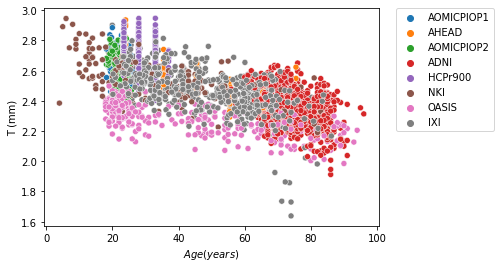

In [24]:
condition = (df_to_analyze["ROI"] == "hemisphere") & (df_to_analyze["hemi"] == "R") & (df_to_analyze["Diagnostic"] == "CTL")
ax = sns.scatterplot(x="Age",y="AvgThickness", hue="Sample", data = df_to_analyze[ condition ])

ax.set(xlabel=r'$Age (years)$', ylabel=r'T (mm)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

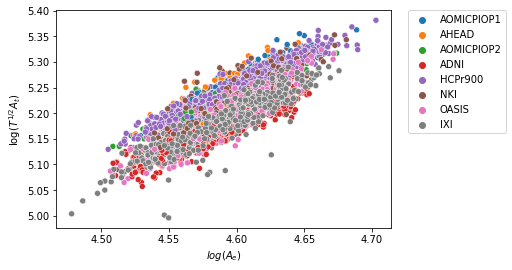

In [25]:
ax = sns.scatterplot(x="x",y="y", hue="Sample", data = df_to_analyze[ condition ])

ax.set(xlabel=r'$log(A_e)$', ylabel=r'log($T^{1/2} A_t)$')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# 1. Cortical folding rule

The measure of $\beta_{exp} = 1.26 \pm 0.01$ in this MRI precision measurement is fantastic!

slope =  1.2625735915062717 +- 0.011275493806735535
intercept =  -0.5684771349838886
r² =  0.9342805851783657
p-value =  0.0


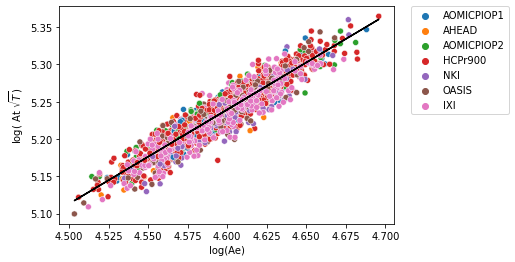

In [34]:
# Only young healthy cortex
condition = (df_to_analyze["Diagnostic"] == "CTL") & (df_to_analyze["ROI"] == "hemisphere") & (df_to_analyze["hemi"] == "R") & (df_to_analyze["Age"] < 50) & (df_to_analyze["Age"] > 20)
data = df_to_analyze[condition][["Age","Sample","Diagnostic","AvgThicknessnew_withAge","TotalArea_correctednew_withAge", "ExposedArea_correctednew_withAge"]].reset_index(drop=True).copy()

data['x'] = data["ExposedArea_correctednew_withAge"]
data['y'] = data["TotalArea_correctednew_withAge"]+0.5*data["AvgThicknessnew_withAge"]
data.dropna(inplace=True)

figplot = sns.scatterplot(x = 'x', y = 'y', hue = 'Sample', data = data)
figplot.set_xlabel('log(Ae)')
figplot.set_ylabel(r'log( At $\sqrt{T}$)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Fit Universal rule
x = data['x']
y = data['y']
res = stats.linregress(x, y)
print('slope = ', res.slope, "+-", res.stderr)
print('intercept = ', res.intercept)
print('r² = ', res.rvalue)
print('p-value = ', res.pvalue)

plt.plot(x, res.intercept+res.slope*x, 'black')
plt.show()

# 2. The index during ageing

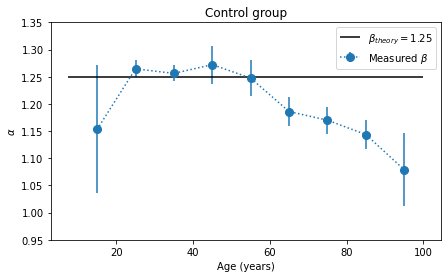

In [33]:
from scipy import stats
x1 = []
y1 = []
y1err = []

for i in np.arange(5,95,10):
    condition = (df_to_analyze["ROI"] == "hemisphere") & (df_to_analyze["Diagnostic"] == "CTL") & (df_to_analyze["hemi"] == "R") & (df_to_analyze['Age']>i) & (df_to_analyze['Age']<i+10)
    df = df_to_analyze[condition]
    x_val = df.xnew_withAge.values
    y_val = df.ynew_withAge.values
    
    result = stats.linregress(x_val, y_val)
    
    x1.append(i+10)
    y1.append(result.slope)
    y1err.append(result.stderr)    

ls = 'dotted'
fig, ax = plt.subplots(figsize=(7, 4))

ax.errorbar(x1, y1, yerr=y1err,marker='o', markersize=8,linestyle=ls, label=r'Measured $\beta$')

# tidy up the figure
ax.set_title('Control group')
ax.set_xlabel('Age (years)')
ax.set_ylabel(r'$ \alpha $')
plt.hlines(1.25, 7.5, 100, colors="black", linestyles='solid', label=r"$\beta_{theory} = 1.25$")
plt.ylim([0.95, 1.35])
plt.legend()
plt.show()

# 3. K morphological variable during ageing

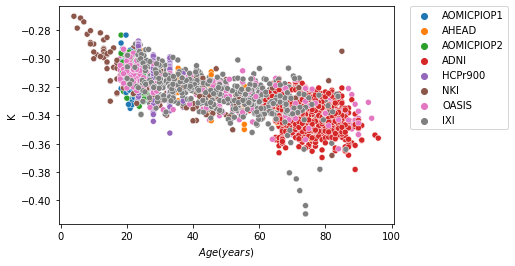

In [32]:
condition = (df_to_analyze["ROI"] == "hemisphere") & (df_to_analyze["hemi"] == "R") & (df_to_analyze["Diagnostic"] == "CTL")
ax = sns.scatterplot(x="Age",y="K_withAge", hue="Sample", data = df_to_analyze[ condition ])

ax.set(xlabel=r'$Age (years)$', ylabel=r'K')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Just remembering that $$K \equiv log k = \frac{1}{2} log\left( \frac{3C}{2} \frac{(p_{ext} + p_{csf})}{\alpha} \right)$$